# Baby Names Results Picture

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

## Prepare Data

In [2]:
csv_path = "artifacts/top50_boy_names.csv"      # adjust if necessary
df = pd.read_csv(csv_path)
df_sorted = df[:10].sort_values("Average_Predicted_Rating", ascending=False)

## Styling

In [3]:
sns.set_theme(style="whitegrid")

# Continuous colormap + normaliser spanning full scale 0-10
cmap = plt.cm.Blues         # or sns.color_palette("Blues", as_cmap=True)
norm = Normalize(vmin=0, vmax=10)

# Build a palette mapping each rating → its colour from the continuous map
palette = {r: cmap(norm(r)) for r in df_sorted["Average_Predicted_Rating"]}

## Plot

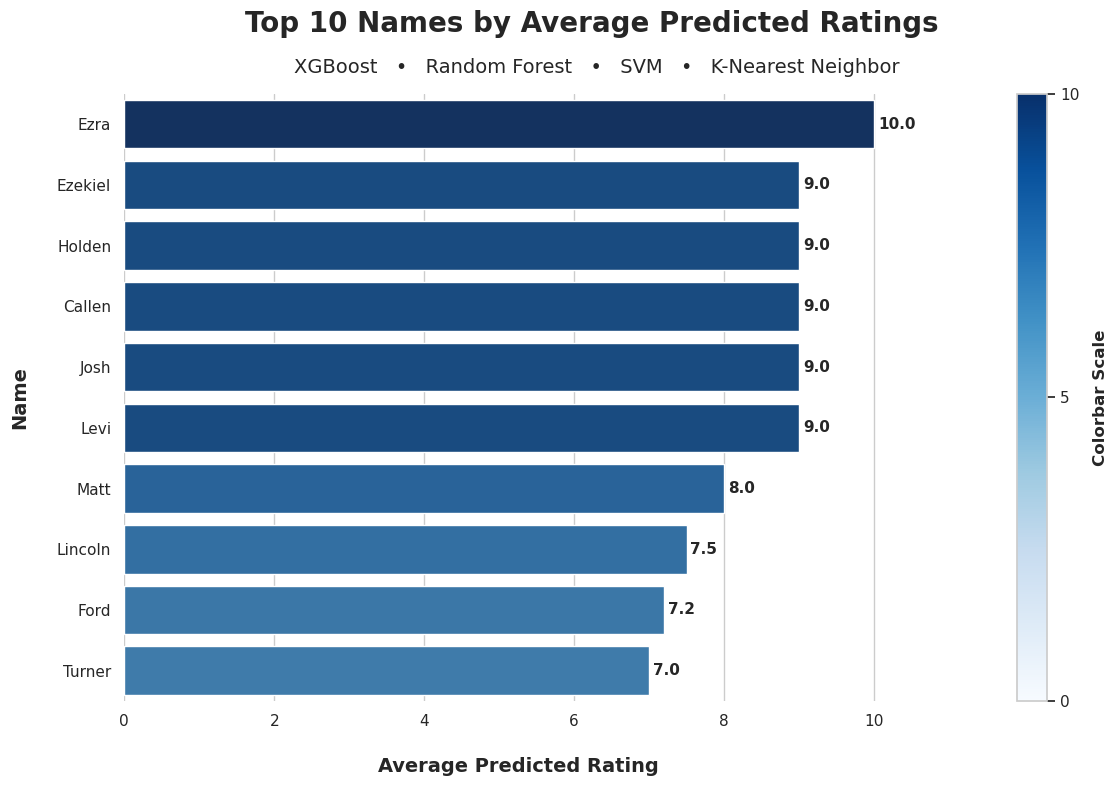

In [4]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

sns.barplot(
    data=df_sorted,
    y="Name",
    x="Average_Predicted_Rating",
    hue="Average_Predicted_Rating",
    dodge=False,
    palette=palette,
    ax=ax,
)

# Inline value labels
for i, rating in enumerate(df_sorted["Average_Predicted_Rating"]):
    ax.text(
        rating + 0.05,
        i,
        f"{rating:.1f}",
        va="center",
        ha="left",
        fontsize=11,
        fontweight="bold",
    )

# Titles & labels
fig.suptitle("Top 10 Names by Average Predicted Ratings", fontsize=20, fontweight="bold", y=0.98)  # y moves it a bit higher

# 2️⃣ smaller subtitle tied to the axes
ax.set_title("XGBoost   •   Random Forest   •   SVM   •   K-Nearest Neighbor", fontsize=14, pad=15, x=.6)
ax.set_xlabel("Average Predicted Rating", fontsize=14, labelpad=20, fontweight="bold")
ax.set_ylabel("Name", fontsize=14, labelpad=20, fontweight="bold")
ax.set_xlim(0, 10.5)   # full 0-10 scale (+ a little padding)

# Add smooth colour-bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required for matplotlib < 3.8
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_ticks([0, 5, 10])
cbar.set_ticklabels(["0", "5", "10"])
cbar.set_label('Colorbar Scale', fontweight='bold', labelpad=10)

# Clean-up
ax.legend_.remove()
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('boy_results.png')
plt.show()